In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
scaled_df=pd.read_csv('/content/drive/MyDrive/scaled.csv')
scaled_df.head(2)

,YEAR,Subtopic,ShortQuestionText,Greater_Risk_Question,Description,Sample_Size,Grade,TopicId,QuestionCode,StratID1,...,StratID3,Sex_Male,Sex_Total,Race_single_race,StratificationType_National,StratificationType_Other,StratificationType_State,StratificationType_Territory,region_island,region_western
0,0.538462,1.000000,0.0,0.0,0.375,0.000055,0.0,1.0,0.915323,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.373719,0.5,0.5,0.550,0.000219,1.0,1.0,0.087366,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
scaled_df.shape

(4572597, 21)

In [3]:
from sklearn.decomposition import PCA
pca=PCA(n_components=9)
pca_data=pca.fit_transform(scaled_df)
pcadf=DataFrame(pca_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9'])
pcadf.head(2)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,0.894135,-0.530408,0.531231,0.857566,-0.077548,0.630687,0.000010,0.050680,-0.160230
1,0.894148,-0.530367,0.539930,-0.551344,-0.077543,0.050585,-0.000003,0.793428,-0.146326


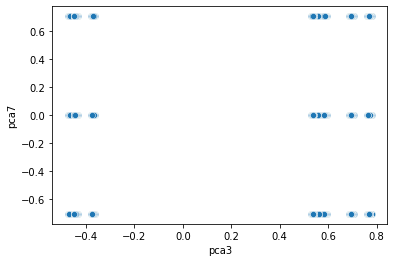

In [5]:
import warnings
warnings.filterwarnings('ignore')
sns.scatterplot(pcadf['pca3'],pcadf['pca7'])

In [4]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

**Aglomerative**

In [7]:
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from scipy.spatial.distance import pdist

In [8]:
# for i in ['single','average','centroid','complete','ward']:
#   l=linkage(pcadf,method=i)
#   p=pdist(pcadf)
#   coeff,dist=cophenet(l,p)
#   print(f"for {i} method the coefficient is {coeff}")


* Agglomerative clustering is not happening because my colab getting crashed whenever i run above codes due to which moving on Kmeans

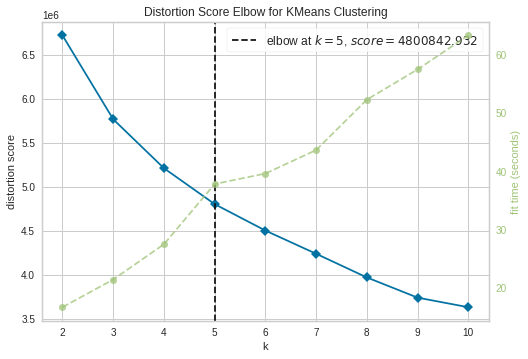

In [9]:
from yellowbrick.cluster import KElbowVisualizer
km=KMeans(random_state=100)
k=KElbowVisualizer(km)
km=k.fit(pcadf)
km.show()

In [5]:
km=KMeans(n_clusters=5,random_state=100)
pcadf['Kmclut']=km.fit_predict(pcadf)


In [6]:
pcadf.head(2)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,Kmclut
0,0.894135,-0.530408,0.531231,0.857566,-0.077548,0.630687,0.000010,0.050680,-0.160230,0
1,0.894148,-0.530367,0.539930,-0.551344,-0.077543,0.050585,-0.000003,0.793428,-0.146326,0


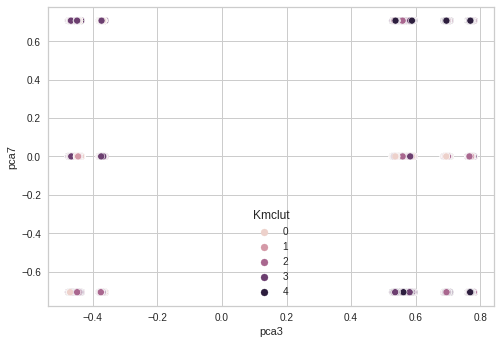

In [13]:
sns.scatterplot(pcadf['pca3'],pcadf['pca7'],hue=pcadf['Kmclut'])

In [11]:
pd.options.display.max_rows=None
pcadf.groupby('Kmclut').describe().T

Kmclut                  0             1             2             3  \
pca1 count  975510.000000  7.620990e+05  1.143150e+06  1.143150e+06   
     mean        0.894155 -4.470469e-01 -3.527185e-01 -5.414799e-01   
     std         0.000026  9.438092e-02  1.866335e-05  1.826803e-05   
     min         0.894133 -5.414471e-01 -3.527412e-01 -5.415023e-01   
     25%         0.894144 -5.414324e-01 -3.527303e-01 -5.414914e-01   
     50%         0.894148 -3.526860e-01 -3.527257e-01 -5.414869e-01   
     75%         0.894161 -3.526711e-01 -3.527038e-01 -5.414650e-01   
     max         0.895090 -3.517692e-01 -3.522340e-01 -5.410062e-01   
pca2 count  975510.000000  7.620990e+05  1.143150e+06  1.143150e+06   
     mean       -0.375676  8.839048e-01 -2.946154e-01 -2.946071e-01   
     std         0.292335  6.439804e-05  3.333351e-01  3.333348e-01   
     min        -0.530414  8.838459e-01 -5.303560e-01 -5.303473e-01   
     25%        -0.530383  8.838817e-01 -5.303215e-01 -5.303128e-01   
     50%        -0.530370  8.838946e-01 -5.303072e-01 -5.302985e-01   
     75%        -0.530338  8.839086e-01  1.767749e-01  1.767833e-01   
     max         0.178849  8.859789e-01  1.778679e-01  1.778510e-01   
pca3 count  975510.000000  7.620990e+05  1.143150e+06  1.143150e+06   
     mean       -0.097125  8.461236e-06 -2.759796e-06 -5.821813e-06   
     std         0.480999  5.029793e-01  5.029790e-01  5.029790e-01   
     min        -0.475587 -4.755792e-01 -4.755859e-01 -4.755890e-01   
     25%        -0.446734 -4.460418e-01 -4.460556e-01 -4.460588e-01   
     50%        -0.442325 -4.400963e-01 -4.401094e-01 -4.401124e-01   
     75%         0.535949  5.378601e-01  5.378475e-01  5.378446e-01   
     max         0.781185  7.811994e-01  7.811909e-01  7.811877e-01   
pca4 count  975510.000000  7.620990e+05  1.143150e+06  1.143150e+06   
     mean        0.000001  2.295957e-05 -9.315349e-06 -1.497857e-05   
     std         0.493985  4.939875e-01  4.939837e-01  4.939836e-01   
     min        -0.552571 -5.525403e-01 -5.519548e-01 -5.519453e-01   
     25%        -0.390522 -3.904900e-01 -3.905358e-01 -3.905417e-01   
     50%        -0.068858 -6.884052e-02 -6.887176e-02 -6.887767e-02   
     75%         0.153137  1.531687e-01  1.531235e-01  1.531176e-01   
     max         0.857622  8.576313e-01  8.576082e-01  8.576023e-01   
pca5 count  975510.000000  7.620990e+05  1.143150e+06  1.143150e+06   
     mean       -0.077543  3.877252e-02  5.897636e-01 -5.122206e-01   
     std         0.000003  5.509924e-01  2.215083e-06  2.204623e-06   
     min        -0.077617 -5.122886e-01  5.897274e-01 -5.122556e-01   
     25%        -0.077545 -5.122199e-01  5.897621e-01 -5.122221e-01   
     50%        -0.077543  5.896923e-01  5.897640e-01 -5.122202e-01   
     75%        -0.077542  5.897643e-01  5.897652e-01 -5.122190e-01   
     max        -0.077539  5.897685e-01  5.897685e-01 -5.122157e-01   
pca6 count  975510.000000  7.620990e+05  1.143150e+06  1.143150e+06   
     mean       -0.000223  3.641336e-07  5.042088e-07 -8.002342e-07   
     std         0.374394  3.740610e-01  3.740614e-01  3.740614e-01   
     min        -0.650351 -6.503471e-01 -6.503234e-01 -6.503240e-01   
     25%        -0.225755 -2.244908e-01 -2.244879e-01 -2.244892e-01   
     50%        -0.088913 -8.692696e-02 -8.692793e-02 -8.692913e-02   
     75%         0.060042  6.054388e-02  6.054476e-02  6.054344e-02   
     max         0.901201  9.012018e-01  9.012056e-01  9.012043e-01   
pca7 count  975510.000000  7.620990e+05  1.143150e+06  1.143150e+06   
     mean       -0.000001 -6.225250e-06  3.394254e-06  3.208827e-06   
     std         0.330737  3.472008e-05  4.082490e-01  4.082490e-01   
     min        -0.707135 -3.144107e-05 -7.071263e-01 -7.071262e-01   
     25%        -0.000010 -1.924233e-05 -2.828343e-06 -2.733661e-06   
     50%        -0.000005 -1.238100e-05  3.457523e-06  3.479313e-06   
     75%         0.000005 -3.426229e-06  1.396970e-05  1.391368e-05   
     max         0.70828

* Lets check the clsutering by making the model

In [7]:
X=pcadf.drop('Kmclut',axis=1)
y=pcadf['Kmclut']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=100)


In [15]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
mod=dt.fit(xtrain,ytrain)

In [14]:
from sklearn.metrics import classification_report
# print(classification_report(ytrain,mod.predict(xtrain)))

In [17]:
print(classification_report(ytest,mod.predict(xtest)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    243744
           1       1.00      1.00      1.00    190635
           2       1.00      1.00      1.00    286219
           3       1.00      1.00      1.00    285140
           4       1.00      1.00      1.00    137412

    accuracy                           1.00   1143150
   macro avg       1.00      1.00      1.00   1143150
weighted avg       1.00      1.00      1.00   1143150

